###    1. Описание структуры исходных данных и задачи в терминах предметной области и машинного обучения

    Задача относится к области сельского хозйства. Данные представляют собой набор характеристик трех различных сортов пшеницы (Kama, Rosa и Canadian) по 70 элементов каждого вида в выборке. Визуализация внутренней структуры зерна была проведена при помощи техники мягкого рентгеновского излучения. Изображения структуры зерен были сохранены на рентгеновские пластины Kodak. Зерна пшеницы были получены с экспериментальных полей Института Агрофизики Польской Академии Наук (г. Люблин).
    

### Формальное описание задачи в терминах машинного обучения

Задачей является: разработать алгоритм классификации зерен пшеницы трех сортов (Kama, Rosa и Canadian) на основе семи параметров измерений зерна.

#### Класс задачи: задача классификации.

#### Исходные прзнаки:

 1. Поверхность (A) 
 2. Периметр (P) 
 3. Компактность (C = 4*pi*A/P^2) 
 4. Длинна зерна 
 5. Ширина зерна 
 6. Коэфициент ассиметрии 
 7. Длинна бороздки зерна
 

#### Целевая переменная

Сорт зерна
1. Cama
2. Rosa
3. Canadian

### 2. Результаты предварительного анализа и визуализации исходных признаков и целевой переменной

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Загрузка данных

In [2]:
df = pd.read_csv("seeds_dataset.txt", sep='\t', header=None)

In [3]:
df.head(10)

0      1       2      3      4      5      6  7
0  15.26  14.84   0.871  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09   0.905  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
5  14.38  14.21  0.8951  5.386  3.312  2.462  4.956  1
6  14.69  14.49  0.8799  5.563  3.259  3.586  5.219  1
7  14.11  14.10  0.8911  5.420  3.302  2.700  5.000  1
8  16.63  15.46       ?  6.053  3.465  2.040  5.877  1
9  16.44  15.25   0.888  5.884  3.505  1.969  5.533  1

In [4]:
# переименуем названия колонок
df.columns = ["Area", "Perimeter", "Compactness", "Kernel_length",\
              "Kernel_width", "Assimetry", "Groove_length",\
              "Class"]
features = ["Area", "Perimeter", "Compactness", "Kernel_length",\
              "Kernel_width", "Assimetry", "Groove_length"]

In [5]:
df.shape

(210, 8)

In [6]:
# информация по датафрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
Area             210 non-null float64
Perimeter        210 non-null float64
Compactness      210 non-null object
Kernel_length    210 non-null float64
Kernel_width     210 non-null object
Assimetry        210 non-null float64
Groove_length    210 non-null float64
Class            210 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 13.2+ KB


##### Все признаки представленны вещественными переменными
##### Классы: три дискретных класса
##### Тип данных Object в признаках Compactness и Kernel_width наводит на мысль о пропущенных данных (NaN)

In [7]:
df.describe()

Area   Perimeter  Kernel_length   Assimetry  Groove_length  \
count  210.000000  210.000000     210.000000  210.000000     210.000000   
mean    14.847524   14.559286       5.628533    3.700201       5.408071   
std      2.909699    1.305959       0.443063    1.503557       0.491480   
min     10.590000   12.410000       4.899000    0.765100       4.519000   
25%     12.270000   13.450000       5.262250    2.561500       5.045000   
50%     14.355000   14.320000       5.523500    3.599000       5.223000   
75%     17.305000   15.715000       5.979750    4.768750       5.877000   
max     21.180000   17.250000       6.675000    8.456000       6.550000   

            Class  
count  210.000000  
mean     2.000000  
std      0.818448  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000

##### Некоторые данные в признаках Compactness и Kernel_width заменены на знаки вопроса, найдем и заменим их.

In [8]:
df["Compactness"].value_counts()
# 3 вопроса (1,4%)

?         3
0.8823    3
0.882     2
0.8977    2
0.8722    2
0.8763    2
0.8923    2
0.8726    2
0.8706    2
0.8849    2
0.8648    2
0.8198    2
0.8716    2
0.8811    2
0.8779    2
0.8658    2
0.8993    2
0.8786    2
0.868     2
0.888     2
0.8883    2
0.9077    2
0.859     2
0.8558    2
0.9008    1
0.8462    1
0.858     1
0.8829    1
0.8859    1
0.8874    1
         ..
0.889     1
0.856     1
0.8921    1
0.8594    1
0.886     1
0.8917    1
0.8496    1
0.8684    1
0.875     1
0.8082    1
0.8359    1
0.8274    1
0.8831    1
0.9035    1
0.9079    1
0.8644    1
0.8291    1
0.8375    1
0.8538    1
0.8511    1
0.8253    1
0.8746    1
0.8988    1
0.8641    1
0.8521    1
0.8664    1
0.8425    1
0.8266    1
0.9056    1
0.8596    1
Name: Compactness, Length: 184, dtype: int64

In [9]:
df["Kernel_width"].value_counts()
# 4 вопроса(1,9%)

?        4
3.026    3
2.879    2
2.967    2
3.594    2
2.763    2
2.85     2
2.975    2
3.377    2
3.333    2
3.485    2
3.201    2
3.312    2
2.675    2
3.769    2
3.857    2
3.755    2
3.465    2
2.911    2
3.158    2
2.821    2
3.155    2
2.81     2
3.156    2
3.199    2
2.849    1
3.371    1
2.787    1
2.833    1
2.994    1
        ..
3.042    1
2.715    1
3.562    1
2.882    1
3.114    1
3.93     1
3.472    1
2.795    1
3.719    1
3.486    1
3.212    1
3.126    1
3.464    1
3.383    1
3.484    1
3.186    1
3.073    1
2.84     1
3.054    1
2.837    1
3.396    1
3.288    1
3.379    1
3.258    1
2.893    1
2.897    1
3.286    1
3.772    1
2.63     1
3.421    1
Name: Kernel_width, Length: 182, dtype: int64

In [10]:
df[df["Compactness"] != '?']["Compactness"].value_counts()

0.8823    3
0.9077    2
0.8763    2
0.8849    2
0.868     2
0.8811    2
0.8883    2
0.8722    2
0.8706    2
0.8726    2
0.8558    2
0.8786    2
0.8779    2
0.8993    2
0.8923    2
0.8658    2
0.8198    2
0.888     2
0.8716    2
0.8648    2
0.882     2
0.8977    2
0.859     2
0.8557    1
0.8728    1
0.8579    1
0.8625    1
0.8541    1
0.8829    1
0.858     1
         ..
0.8382    1
0.8819    1
0.8473    1
0.8894    1
0.8263    1
0.8744    1
0.889     1
0.8921    1
0.8253    1
0.8511    1
0.8189    1
0.8538    1
0.8657    1
0.9081    1
0.8588    1
0.8759    1
0.8865    1
0.8793    1
0.8676    1
0.8683    1
0.885     1
0.8897    1
0.8639    1
0.8991    1
0.8274    1
0.9079    1
0.8644    1
0.8291    1
0.8375    1
0.9006    1
Name: Compactness, Length: 183, dtype: int64

In [11]:
df[df["Kernel_width"] != '?']["Kernel_width"].value_counts().min()


1

In [12]:
# значение 10 не встречается в обеих подгруппах, заменим им вопросы.
d = {'?':10}
df[["Compactness", "Kernel_width"]] = df[["Compactness", "Kernel_width"]].\
    replace(d).astype('float')

##### Построим гистограммы исходных признаков

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112d95710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113333ba8>]], dtype=object)

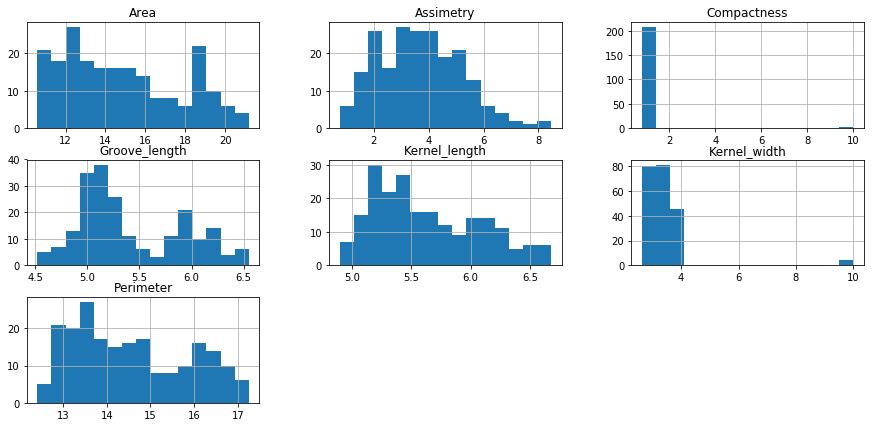

In [13]:
df[features].hist(bins=15, figsize=(15,7))

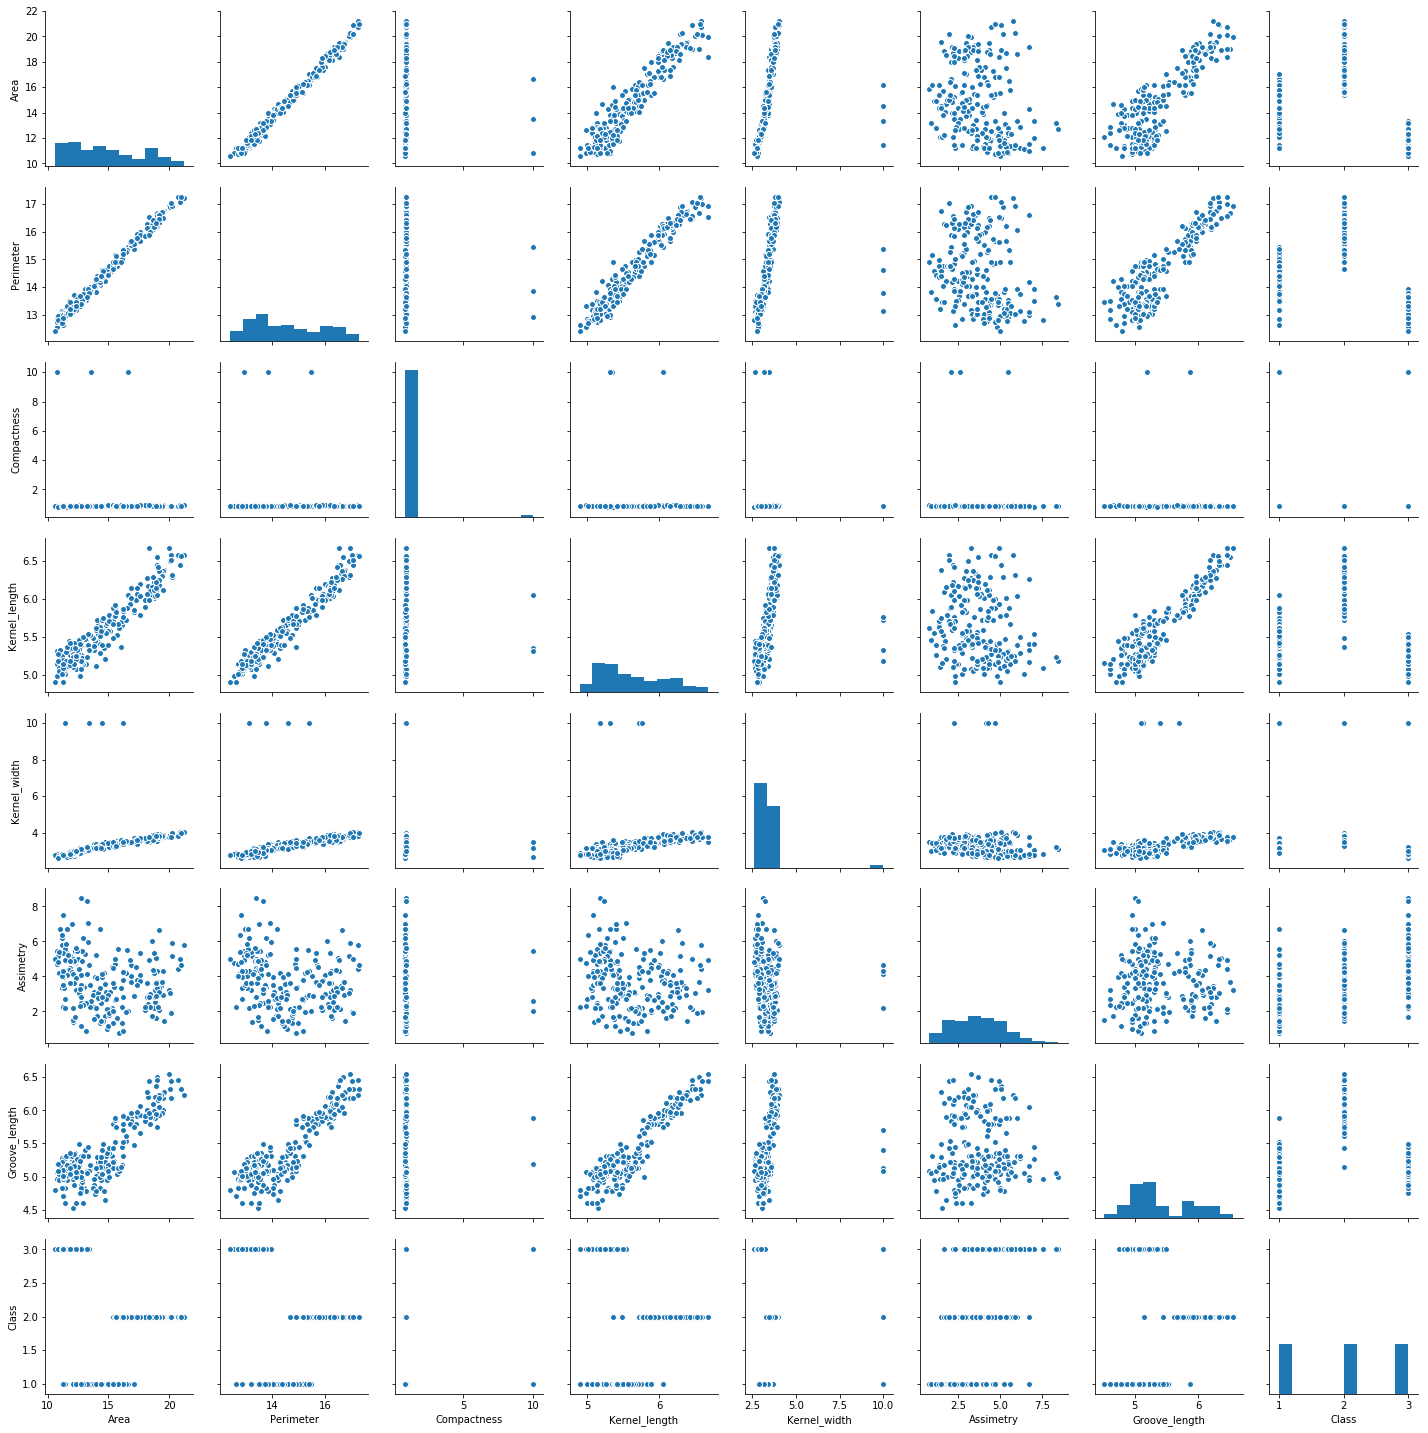

In [14]:
# на вскидку оценим взаимоотношения признаков
sns.pairplot(df) 

### Проанализируем целевую переменную.

In [15]:
df["Class"].describe()

count    210.000000
mean       2.000000
std        0.818448
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Class, dtype: float64

3    70
2    70
1    70
Name: Class, dtype: int64


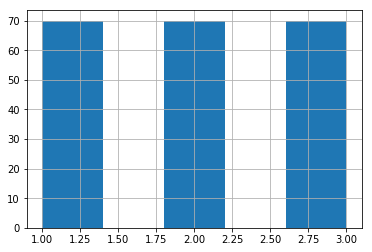

In [16]:
df["Class"].hist(bins=5)
print(df["Class"].value_counts())

##### Классы полностью сбалансированы

### Корреляционный анализ

In [17]:
print(df.corr())
sns.heatmap(df.corr())

                   Area  Perimeter  Compactness  Kernel_length  Kernel_width  \
Area           1.000000   0.994341    -0.036631       0.949985      0.320455   
Perimeter      0.994341   1.000000    -0.033068       0.972422      0.321358   
Compactness   -0.036631  -0.033068     1.000000      -0.007366     -0.031957   
Kernel_length  0.949985   0.972422    -0.007366       1.000000      0.283415   
Kernel_width   0.320455   0.321358    -0.031957       0.283415      1.000000   
Assimetry     -0.229572  -0.217340    -0.033887      -0.171562     -0.089385   
Groove_length  0.863693   0.890784     0.006865       0.932806      0.261221   
Class         -0.346058  -0.327900    -0.060259      -0.257269     -0.117862   

               Assimetry  Groove_length     Class  
Area           -0.229572       0.863693 -0.346058  
Perimeter      -0.217340       0.890784 -0.327900  
Compactness    -0.033887       0.006865 -0.060259  
Kernel_length  -0.171562       0.932806 -0.257269  
Kernel_width   -0.0

##### Площадь, периметр, длина зерна и длина бороздки имееют прямую зависимость

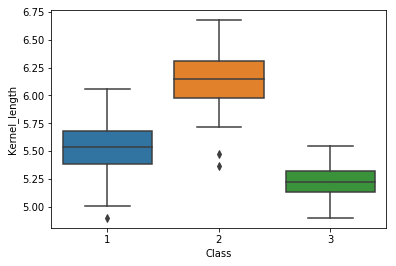

In [18]:
sns.boxplot(x="Class", y="Kernel_length", data=df[["Class","Kernel_length"]],\
           orient='v')

In [19]:
sns.boxplot(x="Class", y="Area", data=df[["Class","Area"]],orient='v')

In [20]:
sns.boxplot(x="Class", y="Perimeter", data=df[["Class","Perimeter"]],orient='v')

##### Площадь, периметр и длина зерна лучше всего делят данные на классы

## 3. Подготовка данных

In [21]:
X = df[features]
y = df['Class']

## 4. Обучение и тестирование моделей

In [22]:
random_state = 11

### Критерии расщепления

In [23]:
criteria = ['gini', 'entropy']

for cr in criteria:
    clf = DecisionTreeClassifier(criterion=cr, random_state=random_state)
    scores = cross_val_score(clf, X, y, cv=5)
    print('Criterion: {}, accuracy score: {}'.format(cr, scores.mean()))

Criterion: gini, accuracy score: 0.8952380952380953
Criterion: entropy, accuracy score: 0.9142857142857143


##### Результаты не очень высокие, лучший критерий - энтропия

### Количество признаков (max_features)

In [24]:
max_features = list(range(2, 8))

for mf in max_features:
    clf = DecisionTreeClassifier(criterion="entropy",\
                                 random_state=random_state,\
                                max_features=mf)
    scores = cross_val_score(clf, X, y, cv=5)
    print('Max_features: {}, accuracy score: {}'.format(mf, scores.mean()))

Max_features: 2, accuracy score: 0.8571428571428573
Max_features: 3, accuracy score: 0.8761904761904763
Max_features: 4, accuracy score: 0.8952380952380953
Max_features: 5, accuracy score: 0.8952380952380953
Max_features: 6, accuracy score: 0.8761904761904761
Max_features: 7, accuracy score: 0.9142857142857143


##### Лучший результат при использовании всех признаков. Оптимально = 7

### Глубина дерева (max_depth)

Max_depth: 2, accuracy score: 0.8904761904761905
Max_depth: 3, accuracy score: 0.8761904761904761
Max_depth: 4, accuracy score: 0.8809523809523808
Max_depth: 5, accuracy score: 0.9
Max_depth: 6, accuracy score: 0.9095238095238095
Max_depth: 7, accuracy score: 0.9142857142857143
Max_depth: 8, accuracy score: 0.9142857142857143
Max_depth: 9, accuracy score: 0.9142857142857143
Max_depth: 10, accuracy score: 0.9142857142857143
Max_depth: 11, accuracy score: 0.9142857142857143
Max_depth: 12, accuracy score: 0.9142857142857143
Max_depth: 13, accuracy score: 0.9142857142857143
Max_depth: 14, accuracy score: 0.9142857142857143
Max_depth: 15, accuracy score: 0.9142857142857143
Max_depth: 16, accuracy score: 0.9142857142857143
Max_depth: 17, accuracy score: 0.9142857142857143
Max_depth: 18, accuracy score: 0.9142857142857143
Max_depth: 19, accuracy score: 0.9142857142857143


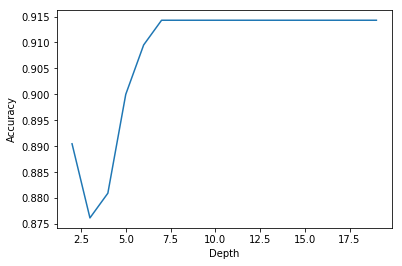

In [25]:
max_depth = list(range(2,20))
scoring = []

for md in max_depth:
    clf = DecisionTreeClassifier(criterion="entropy",\
                                 random_state=random_state, max_depth=md)
    scores = cross_val_score(clf, X, y, cv=5)
    scoring.append(scores.mean())
    print("Max_depth: {}, accuracy score: {}".format(md, scores.mean()))
    
plt.plot(max_depth, scoring)
plt.xlabel('Depth')
plt.ylabel('Accuracy')

Оптимальная глубина = 7

# 5. Визуализация ДР

In [26]:
from sklearn.tree import export_graphviz

for depth in [3,7]:
    clf = DecisionTreeClassifier(criterion='entropy', max_features=7, max_depth=depth, random_state=random_state)
    clf.fit(X, y)
    export_graphviz(clf, out_file='tree{}.dot'.format(depth))

In [27]:
!dot -Tpng tree3.dot -o tree3.png
!dot -Tpng tree7.dot -o tree7.png

#### Сравним еще и с методом логистической регрессии, которая должна оптимально подходить для наших данных

In [28]:
# logistic regression
lr_clf = LogisticRegressionCV(cv=5, penalty='l1', solver="liblinear", class_weight="balanced",\
                              random_state=random_state)

In [29]:
model = lr_clf.fit(X, y)

In [30]:
model.score(X,y) # считает среднее значение model.predict(X) 

0.98571428571428577

In [31]:
scores = cross_val_score(model, X, y, cv=5)
scores.mean()

0.9571428571428573

In [32]:
scores

array([ 0.97619048,  1.        ,  0.95238095,  0.95238095,  0.9047619 ])

## Выводы

Проведен анализ задачи классификации и решение ее с использованием метода машинного обучения деревья решений.
Входные данные (признаки) полностью числовые с минимальными пропусками в данных (не более 2%).
При первичном анализе выделены признаки, которые оптимально делили данные на классы (площадь, периметр и длина зерна).
Проведено пробное построение деревьев решений с использованием различных параметров. Лучший результат показало дерево,
в котором использованы следующие параметры: критерий - энтропия, максимальной число признаков - 7, максимальная глубина дерева - 7.
При выбранных параметрах достигнута точность классификации - 0.914.
Кроме деревьев решений для сравнения использован метод решения задач классификации: логистическая регрессия. Этот метод был выбран с учетом картины входящих данных (небольшое количество признаков и тип принаков - вещественные). Со стандартными методами оптимизации и регуляризации достигнута высокая точность классификации - 0.957. Значение model.score больше чем cros_val_score.mean, потому что несмортря на то, что классификатор использовал кросс-валидацию, обучение модели (fit) в итоге дает нам лучшие из полученных весов. Метод model.score считает среднее значение model.predict(X) по отношению к y и значит находит score при использовании лучшего веса. cros_val_score же считает среднее всех score полученных при кросс-валидации. 